# NY counties k-means clustering


## This script contains the following points:
1. Import libraries
2. Import ny_county3_total.csv dataset
3. Verify the dataset
3. Data prep for elbow technique
4. Elbow technique 
5. k-means clustering
6. Evaluate results

### 1. Importing Libraries

In [1]:
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# import visualization libraries
import numpy as np # linear algebra
import os # accessing directory structure

# for graphs
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# PyLab is a convenience module that bulk imports matplotlib
import pylab as pl 

# import the k-means algorithm from scikit-learn
import sklearn
from sklearn.cluster import KMeans 

### 2. Importing NY State dataset

The dataset NY_county3_total.csv was created by combining data from the USDA FOOD Access Research Atlas and NY State Medicaid data, inclusive of NYS counties with total populations of 100k or less, Total Low Income populations in those counties, and average monthly Medicaid beneficiaries.

NY State Medicaid data prepared by NYS Department of Health, Fiscal Management Group, FSSU, Data Management @ https://www.health.ny.gov/statistics/health_care/medicaid/quarterly/ssd/.


In [2]:
path = r'C:\Users\howl6\OneDrive\Certificates\CareerFoundry\Coursework\Data_Immersion\Chapter 6\Food_Desert'

In [28]:
ny_county = pd.read_csv(os.path.join(path, '02_Data', 'cleaned_data', 'ny_county3_total.csv'), index_col=False)

In [29]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### 3. Verify the dataset

In [30]:
ny_county.head(60)

,Unnamed: 0,County,Total_Population,Sum of Total_Low_Income,Average Monthly Beneficiaries,Population_flag
0,1,Allegany,48946,16451,8696,Low_Population
1,3,Cattaraugus,80317,29283,15125,Low_Population
2,4,Cayuga,80026,22934,13683,Low_Population
3,6,Chemung,88830,28180,17994,Low_Population
4,7,Chenango,50477,17390,9844,Low_Population
5,8,Clinton,82128,23298,14817,Low_Population
6,9,Columbia,63096,16729,9871,Low_Population
7,10,Cortland,49336,14994,9248,Low_Population
8,11,Delaware,47980,15031,8159,Low_Population
9,14,Essex,39370,10275,5949,Low_Population


In [31]:
ny_county.tail()

,Unnamed: 0,County,Total_Population,Sum of Total_Low_Income,Average Monthly Beneficiaries,Population_flag
29,53,Warren,65707,16625,10173,Low_Population
30,54,Washington,63216,18769,10674,Low_Population
31,55,Wayne,93772,25888,15073,Low_Population
32,57,Wyoming,42155,10737,5391,Low_Population
33,58,Yates,25348,8044,4027,Low_Population


In [32]:
ny_county.shape

(34, 6)

In [33]:
ny_county.columns

Index(['Unnamed: 0', 'County', 'Total_Population', 'Sum of Total_Low_Income',
       'Average Monthly Beneficiaries', 'Population_flag'],
      dtype='object')

In [34]:
ny_county.dtypes

Unnamed: 0                        int64
County                           object
Total_Population                  int64
Sum of Total_Low_Income           int64
Average Monthly Beneficiaries     int64
Population_flag                  object
dtype: object

### 4. Data Prep for elbow technique

In [35]:
# removing categorical columns so that Kmeans can run correctly

ny_county4 = ny_county.drop(columns = ['Unnamed: 0', 'County','Population_flag'])

In [36]:
ny_county4.columns

Index(['Total_Population', 'Sum of Total_Low_Income',
       'Average Monthly Beneficiaries'],
      dtype='object')

In [49]:
ny_county4.rename(columns = {'Total_Population' : 'Population', 'Sum of Total_Low_Income' : 'Low Income', 'Average Monthly Beneficiaries' : 'Beneficiaries'}, inplace = True)

In [17]:
# This option ensures the graphs are displayed without the need to "call" them specifically.

%matplotlib inline

I want to look at the relationship between the total population with total low income in all NY census tracts.

### 5. Elbow technique

In [20]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [40]:
score = [kmeans[i].fit(ny_county4).score(ny_county4) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\howl6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-19170811510.411766,
 -7253416886.291667,
 -3282550934.5317454,
 -2120953556.0921714,
 -1629424690.6750002,
 -1134081361.5477273,
 -841762854.9253968,
 -538256728.2861111,
 -461802853.5920635]

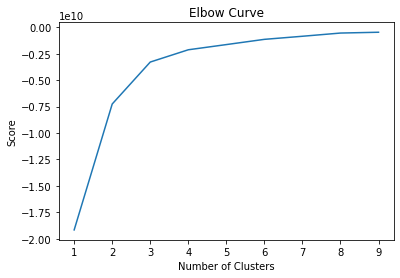

In [41]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The curve begins to straighten out after three; therefore the optimal cluster count is three.

### k-means clustering

In [42]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 


In [43]:
# Fit the k-means object to the data.

kmeans.fit(ny_county4)

C:\Users\howl6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [44]:
ny_county4['clusters'] = kmeans.fit_predict(ny_county4)

C:\Users\howl6\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [56]:
ny_county4.head()

,Population,Low Income,Beneficiaries,clusters
0,48946,16451,8696,1
1,80317,29283,15125,0
2,80026,22934,13683,0
3,88830,28180,17994,0
4,50477,17390,9844,1


In [57]:
ny_county4['clusters'].value_counts()

1    18
0     9
2     7
Name: clusters, dtype: int64

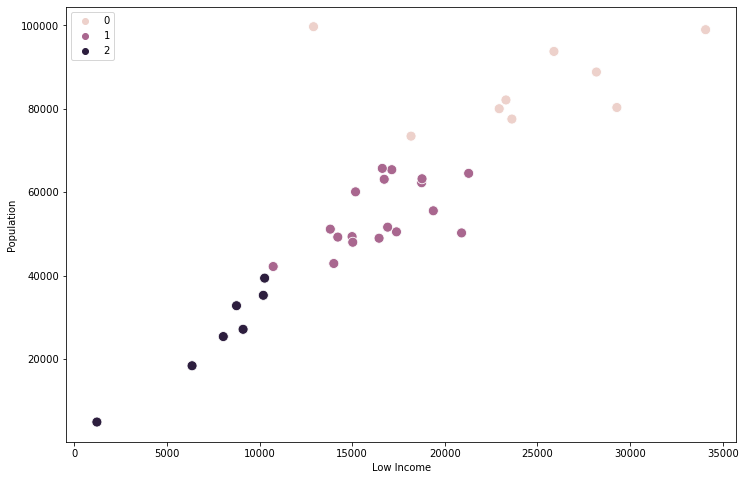

In [65]:
# Plot the clusters for the "Population" and "Low Income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ny_county4['Low Income'], y=ny_county4['Population'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Low Income') # Label x-axis.
plt.ylabel('Population') # Label y-axis.
plt.show()

The medium purple cluster is the most populated cluster, and reflects total populations between 40-65,000 having a low income population primarily between 15-22,000. The dark purple reflects that total populations at or below 40,000 primarily have low income populations at or below 10,000.  The pink cluster reflects that total populations at or above 70,000 have low income populations primarily above 20,000.

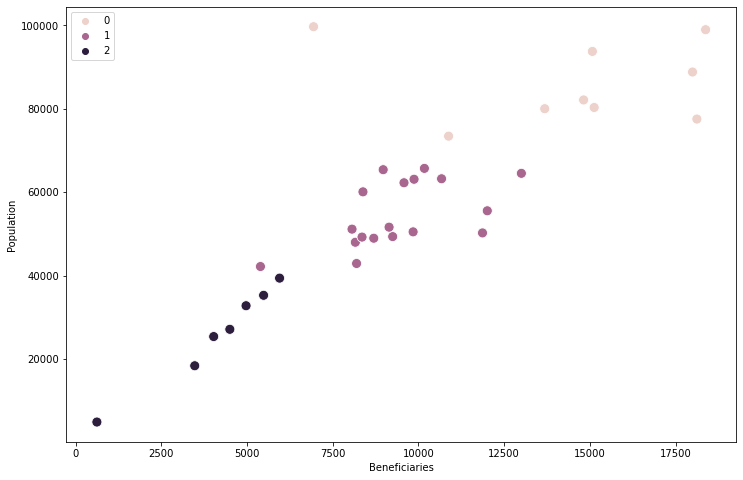

In [66]:
# Plot the clusters for the "Beneficiaries" and "Population" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ny_county4['Beneficiaries'], y=ny_county4['Population'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Beneficiaries') # Label x-axis.
plt.ylabel('Population') # Label y-axis.
plt.show()

The medium purple cluster is the most populated cluster, and reflects total populations between 40-65,000 having total average Medicaid beneficiaries primarily between 8-15,000. The dark purple reflects that total populations at or below 40,000 primarily have average beneficiaries below 7500.  The pink cluster reflects that total populations at or above 70,000 have average beneficiaries primarily at or above 15,000, with a couple of outliers, one around 7500 and one around 10000.

In [68]:
ny_county4.loc[ny_county4['clusters'] == 2, 'cluster'] = 'dark purple'
ny_county4.loc[ny_county4['clusters'] == 1, 'cluster'] = 'purple'
ny_county4.loc[ny_county4['clusters'] == 0, 'cluster'] = 'pink'

In [69]:
ny_county4.groupby('cluster').agg({'Population':['mean', 'median'], 
                         'Low Income':['mean', 'median'], 
                         'Beneficiaries':['mean', 'median']})

Population           Low Income        Beneficiaries         
                     mean median          mean median          mean   median
cluster                                                                     
dark purple  26140.571429  27087   7710.714286   8757   4146.000000   4498.0
pink         86084.666667  82128  24262.666667  23618  14556.444444  15073.0
purple       54652.277778  51362  16573.555556  16677   9423.222222   9195.5

### 7. Evaluate results

The pink cluster has the highest statistics for all three variables.  The median population for this cluster is 82,128, has a median low income population of 23,618, and a median of 15,073 Medicaid beneficiaries.  This suggests for instance that about a quarter of the population in the counties reflected in this cluster are also in the low income population, and almost two thirds of the low income population in this cluster may be Medicaid beneficiaries. Since this dataset reflects populations at or below 100,000, the k-means clusters and descriptive statistics highlight that for counties at the high end of total population, disparities regarding low income and Medicaid utilization are more evident.  This may be a reflection of counties that are closer to urban centers where total population is likely to be higher than in rural counties.

Since I'm interested in examining food deserts, the purple cluster in particular may be an area of further exploration, as it was the most populated cluster and reflects a smaller subset of total population.  This may suggest populations that may be more diverse in terms of geography and rural vs. urban.  

The choropleth analysis conducted earlier suggested that populations located in proximity to larger urban centers are less likely to be in a food desert tract.  Therefore. analysis of regions with smaller populations and further from urban centers may provide further insights into the prevalence of food deserts in these regions.